In [1]:
# https://github.com/pierre-haessig/ausgrid-solar-data?tab=readme-ov-file
import pandas as pd
import numpy as np


SRC_PATH = "./AusGrid/2012-2013 Solar home electricity data v2.csv"
# SRC_PATH = "./AusGrid/2011-2012 Solar home electricity data v2.csv"
FIELD = 'Pload_actual'
# FIELD = 'Ppv_actual'

In [2]:
d_raw = pd.read_csv(SRC_PATH, skiprows=1, na_filter=False, parse_dates=['date'], dayfirst=True,)        
d_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268557 entries, 0 to 268556
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Customer              268557 non-null  int64         
 1   Generator Capacity    268557 non-null  float64       
 2   Postcode              268557 non-null  int64         
 3   Consumption Category  268557 non-null  object        
 4   date                  268557 non-null  datetime64[ns]
 5   0:30                  268557 non-null  float64       
 6   1:00                  268557 non-null  float64       
 7   1:30                  268557 non-null  float64       
 8   2:00                  268557 non-null  float64       
 9   2:30                  268557 non-null  float64       
 10  3:00                  268557 non-null  float64       
 11  3:30                  268557 non-null  float64       
 12  4:00                  268557 non-null  float64       
 13 

In [3]:
d_raw.head()


,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,2012-07-01,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,
1,1,3.78,2076,GC,2012-07-01,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,
2,1,3.78,2076,GG,2012-07-01,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
3,1,3.78,2076,CL,2012-07-02,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,
4,1,3.78,2076,GC,2012-07-02,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,


In [4]:
d_raw.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
268552,300,3.36,2086,GC,2013-06-29,0.171,0.832,0.440,0.745,0.149,...,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,
268553,300,3.36,2086,GG,2013-06-29,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,
268554,300,3.36,2086,CL,2013-06-30,2.501,2.475,2.491,2.508,2.490,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,
268555,300,3.36,2086,GC,2013-06-30,0.150,0.158,0.157,0.137,0.163,...,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,
268556,300,3.36,2086,GG,2013-06-30,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,


In [5]:
Postcode = sorted(d_raw.Postcode.unique())
len(Postcode)

100

In [6]:
from pandas.tseries.offsets import Day
dmin, dmax = d_raw.date.min(), d_raw.date.max()
print(dmin, dmax)

2012-07-01 00:00:00 2013-06-30 00:00:00


In [7]:
index = pd.date_range(dmin, dmax + Day(1), freq='30min')
index = index[1:]
index


DatetimeIndex(['2012-07-01 00:30:00', '2012-07-01 01:00:00',
               '2012-07-01 01:30:00', '2012-07-01 02:00:00',
               '2012-07-01 02:30:00', '2012-07-01 03:00:00',
               '2012-07-01 03:30:00', '2012-07-01 04:00:00',
               '2012-07-01 04:30:00', '2012-07-01 05:00:00',
               ...
               '2013-06-30 19:30:00', '2013-06-30 20:00:00',
               '2013-06-30 20:30:00', '2013-06-30 21:00:00',
               '2013-06-30 21:30:00', '2013-06-30 22:00:00',
               '2013-06-30 22:30:00', '2013-06-30 23:00:00',
               '2013-06-30 23:30:00', '2013-07-01 00:00:00'],
              dtype='datetime64[ns]', length=17520, freq='30min')

In [8]:
customers = sorted(d_raw.Customer.unique())
print(customers)
categories = sorted(d_raw['Consumption Category'].unique(), reverse=True)
print(categories)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [9]:
columns = pd.MultiIndex.from_product(
    (customers, categories), names=['Customer', 'categories'])
columns

MultiIndex([(  1, 'GG'),
            (  1, 'GC'),
            (  1, 'CL'),
            (  2, 'GG'),
            (  2, 'GC'),
            (  2, 'CL'),
            (  3, 'GG'),
            (  3, 'GC'),
            (  3, 'CL'),
            (  4, 'GG'),
            ...
            (297, 'CL'),
            (298, 'GG'),
            (298, 'GC'),
            (298, 'CL'),
            (299, 'GG'),
            (299, 'GC'),
            (299, 'CL'),
            (300, 'GG'),
            (300, 'GC'),
            (300, 'CL')],
           names=['Customer', 'categories'], length=900)

In [10]:
empty_cols = pd.MultiIndex(
    levels=[customers, categories],
    codes=[[],[]],
    names=['Customer', 'categories'])
empty_cols

MultiIndex([], names=['Customer', 'categories'])

In [11]:
df = pd.DataFrame(index=index, columns=empty_cols)
df = df.iloc[:]
df

2012-07-01 00:30:00
2012-07-01 01:00:00
2012-07-01 01:30:00
2012-07-01 02:00:00
2012-07-01 02:30:00
...
2013-06-30 22:00:00
2013-06-30 22:30:00
2013-06-30 23:00:00
2013-06-30 23:30:00
2013-07-01 00:00:00


In [12]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

missing_records = []

for c in customers:
    d_c = d_raw[d_raw.Customer == c]
    
    # TODO: save the row quality
    print(c, end=', ')
    
    for ch in categories:
        d_c_ch = d_c[d_c['Consumption Category'] == ch]
        ts = d_c_ch.iloc[:,5:-1].values.ravel()
        if len(ts) != len(index):
            missing_records.append((c,ch, len(ts)))
        else:
            df[c, ch] = ts

1, 2, 3, 

4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [13]:
len(columns)


900

In [14]:
len(missing_records)


175

In [15]:
n_empty_CL = 0
missing_records_others = []
for (c, ch, len_ts) in missing_records:
    if ch=='CL' and len_ts==0:
        n_empty_CL += 1
    else:
        missing_records_others.append((c, ch, len_ts))
n_empty_CL

162

In [16]:
missing_records_others


[(2, 'GG', 13632),
 (2, 'GC', 13632),
 (2, 'CL', 13632),
 (68, 'CL', 14400),
 (95, 'CL', 15264),
 (161, 'CL', 14688),
 (187, 'CL', 14736),
 (248, 'CL', 15360),
 (272, 'CL', 14400),
 (284, 'CL', 14400),
 (289, 'CL', 14640),
 (293, 'CL', 15216),
 (294, 'CL', 14736)]

In [17]:
d_27_CL = d_raw[(d_raw.Customer == 68) & (d_raw['Consumption Category'] == 'CL')]
d_27_CL['date'].iloc[[0,-1]]

61077   2012-07-01
62104   2013-06-30
Name: date, dtype: datetime64[ns]

In [18]:
len(df.columns) + len(missing_records)

900

In [19]:
df_out = df*2000 # convert kwh to w
df_out.to_csv('AusGrid_preprocess.csv')
df_out

Customer             1                    3                 4           \
categories            GG      GC      CL   GG      GC   CL   GG     GC   
2012-07-01 00:30:00  0.0  1710.0  2500.0  0.0  1930.0  0.0  0.0  168.0   
2012-07-01 01:00:00  0.0  1572.0  2500.0  0.0  1854.0  0.0  0.0  168.0   
2012-07-01 01:30:00  0.0  1208.0  2500.0  0.0  2718.0  0.0  0.0  164.0   
2012-07-01 02:00:00  0.0  1088.0  2526.0  0.0   120.0  0.0  0.0  168.0   
2012-07-01 02:30:00  0.0  1194.0   262.0  0.0   118.0  0.0  0.0  172.0   
...                  ...     ...     ...  ...     ...  ...  ...    ...   
2013-06-30 22:00:00  0.0   548.0     0.0  0.0   112.0  0.0  0.0  268.0   
2013-06-30 22:30:00  0.0  1018.0     0.0  0.0   112.0  0.0  0.0  274.0   
2013-06-30 23:00:00  0.0   332.0     0.0  0.0   130.0  0.0  0.0  280.0   
2013-06-30 23:30:00  0.0  1722.0     0.0  0.0   126.0  0.0  0.0  224.0   
2013-07-01 00:00:00  0.0  1262.0  2112.0  0.0   104.0  0.0  0.0  214.0   

Customer                     5    ...  297                 298         299  \
categories               CL   GG  ...   GG     GC      CL   GG     GC   GG   
2012-07-01 00:30:00     0.0  0.0  ...  0.0  282.0     0.0  0.0  314.0  0.0   
2012-07-01 01:00:00     0.0  0.0  ...  0.0  514.0     0.0  0.0  254.0  0.0   
2012-07-01 01:30:00  3860.0  0.0  ...  0.0  394.0     0.0  0.0  244.0  0.0   
2012-07-01 02:00:00  3956.0  0.0  ...  0.0  546.0  2660.0  0.0  240.0  0.0   
2012-07-01 02:30:00  1568.0  0.0  ...  0.0  412.0     0.0  0.0  212.0  0.0   
...                     ...  ...  ...  ...    ...     ...  ...    ...  ...   
2013-06-30 22:00:00     0.0  0.0  ...  0.0  334.0     0.0  0.0  534.0  0.0   
2013-06-30 22:30:00     0.0  0.0  ...  0.0  358.0  1550.0  0.0  546.0  0.0   
2013-06-30 23:00:00     0.0  0.0  ...  0.0  362.0  4826.0  0.0  494.0  0.0   
2013-06-30 23:30:00     0.0  0.0  ...  0.0  342.0  2190.0  0.0  298.0  0.0   
2013-07-01 00:00:00     0.0  0.0  ...  0.0  354.0     0.0  0.0  276.0  0.0   

Customer                     300                  
categories               GC   GG      GC      CL  
2012-07-01 00:30:00  1082.0  0.0   438.0  5346.0  
2012-07-01 01:00:00   200.0  0.0   198.0  2492.0  
2012-07-01 01:30:00   180.0  0.0   268.0     0.0  
2012-07-01 02:00:00   188.0  0.0   200.0     0.0  
2012-07-01 02:30:00    92.0  0.0   246.0     0.0  
...                     ...  ...     ...     ...  
2013-06-30 22:00:00  1236.0  0.0  1162.0     0.0  
2013-06-30 22:30:00  1136.0  0.0   916.0     0.0  
2013-06-30 23:00:00  1664.0  0.0   944.0     0.0  
2013-06-30 23:30:00  1520.0  0.0  1464.0     0.0  
2013-07-01 00:00:00   300.0  0.0   594.0  4936.0  

[17520 rows x 725 columns]

In [20]:
df = pd.read_csv('AusGrid_preprocess.csv', header=[0,1], index_col=0)
df = df.set_index(pd.to_datetime(df.index))
df.columns = df.columns.set_levels(df.columns.levels[0].astype('int64'), level=0)
df.head()

Customer             1                    3                 4           \
categories            GG      GC      CL   GG      GC   CL   GG     GC   
2012-07-01 00:30:00  0.0  1710.0  2500.0  0.0  1930.0  0.0  0.0  168.0   
2012-07-01 01:00:00  0.0  1572.0  2500.0  0.0  1854.0  0.0  0.0  168.0   
2012-07-01 01:30:00  0.0  1208.0  2500.0  0.0  2718.0  0.0  0.0  164.0   
2012-07-01 02:00:00  0.0  1088.0  2526.0  0.0   120.0  0.0  0.0  168.0   
2012-07-01 02:30:00  0.0  1194.0   262.0  0.0   118.0  0.0  0.0  172.0   

Customer                     5    ...  297                 298         299  \
categories               CL   GG  ...   GG     GC      CL   GG     GC   GG   
2012-07-01 00:30:00     0.0  0.0  ...  0.0  282.0     0.0  0.0  314.0  0.0   
2012-07-01 01:00:00     0.0  0.0  ...  0.0  514.0     0.0  0.0  254.0  0.0   
2012-07-01 01:30:00  3860.0  0.0  ...  0.0  394.0     0.0  0.0  244.0  0.0   
2012-07-01 02:00:00  3956.0  0.0  ...  0.0  546.0  2660.0  0.0  240.0  0.0   
2012-07-01 02:30:00  1568.0  0.0  ...  0.0  412.0     0.0  0.0  212.0  0.0   

Customer                     300                 
categories               GC   GG     GC      CL  
2012-07-01 00:30:00  1082.0  0.0  438.0  5346.0  
2012-07-01 01:00:00   200.0  0.0  198.0  2492.0  
2012-07-01 01:30:00   180.0  0.0  268.0     0.0  
2012-07-01 02:00:00   188.0  0.0  200.0     0.0  
2012-07-01 02:30:00    92.0  0.0  246.0     0.0  

[5 rows x 725 columns]

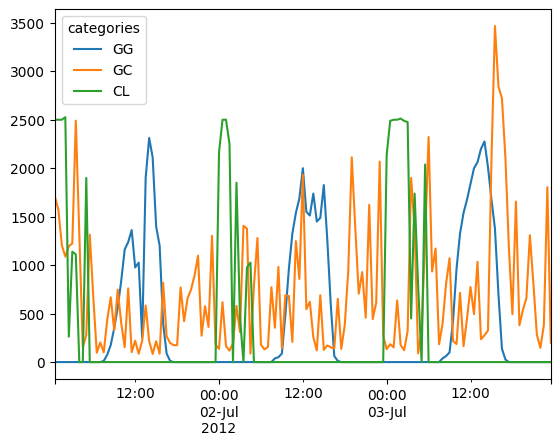

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ax = df[1]['2012-07-01':'2012-07-03'].plot()



<Axes: >

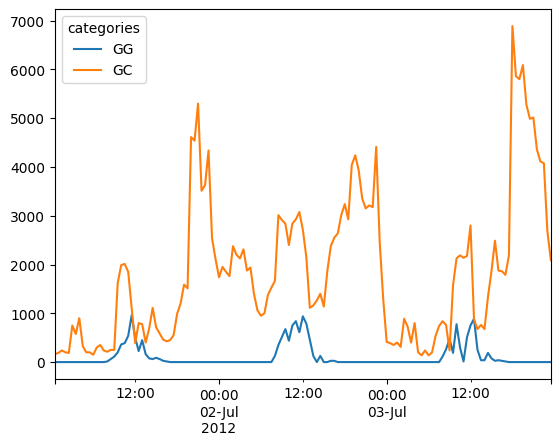

In [22]:
df[100]['2012-07-01':'2012-07-03'].plot()